1. A(i, j) = 1/(i+j+1), M = N = 2048, Вызвать SVD rank(10), R-SVD rank(15), Сравнить уровни погрешностей

In [1]:
# !pip install scipy

In [2]:
import numpy as np
import time
import scipy
from sklearn.utils.extmath import randomized_svd as rsvd
N = 2048

A = np.zeros([N, N])
for i in range(N):
    for j in range(N):
        A[i][j] = 1/(i+j+1)
        
#SVD:
rang_1 = 10

startSVD = time.time()
U, S, V = scipy.linalg.svd(A, full_matrices=False)
endSVD = time.time()
SVD_err = np.linalg.norm(A - np.dot(U[:, :rang_1] * S[:rang_1], V[:rang_1, :])) 
print('time SVD:',endSVD-startSVD)

#R_SVD:
rang_2 = 10

startRSVD = time.time()
U1,S1,V1 = rsvd(A , n_components=rang_2, random_state=np.random.randint(1))
endRSVD = time.time()
print('time RSVD:',endRSVD-startRSVD)
R_SVD_err = np.linalg.norm(A - np.dot(U1[:, :rang_2] * S1[:rang_2], V1[:rang_2, :]))

print("Error SVD rank 10:", SVD_err)
print("Error R-SVD rank 10:", R_SVD_err)

time SVD: 8.384622812271118
time RSVD: 0.40873217582702637
Error SVD rank 10: 0.00011121897887396484
Error R-SVD rank 10: 0.00011121897887397094


2. Вычислить вектор PageRank для метро

In [3]:
# !pip install networkx

In [4]:
import json
import networkx as nx
import matplotlib.pyplot as plt

In [5]:
my_path = 'spb_sub2.json'

with open(my_path, "r", encoding="utf-8") as file:
    data = json.load(file)

G = nx.Graph()
node_color = []

# Добавляем узлы (станции)
for line, line_data in data['Lines'].items():
    line_color = line_data['color']
    for i in range(len(line_data['stations'])):
        station = line_data['stations'][i]
        G.add_node(station, name=station)
        node_color.append(line_color)
        if i > 0:
            prev_i = i-1
            station_prev = line_data['stations'][prev_i]
            G.add_edge(station, station_prev)


for transfer_number, transfer_data in data['Transfers'].items():
    for i in range(int(transfer_data['amount']) - 1):
        for j in range(i+1, int(transfer_data['amount'])):
            station1 = transfer_data['stations'][i]
            station2 = transfer_data['stations'][j]
            G.add_edge(station1, station2)


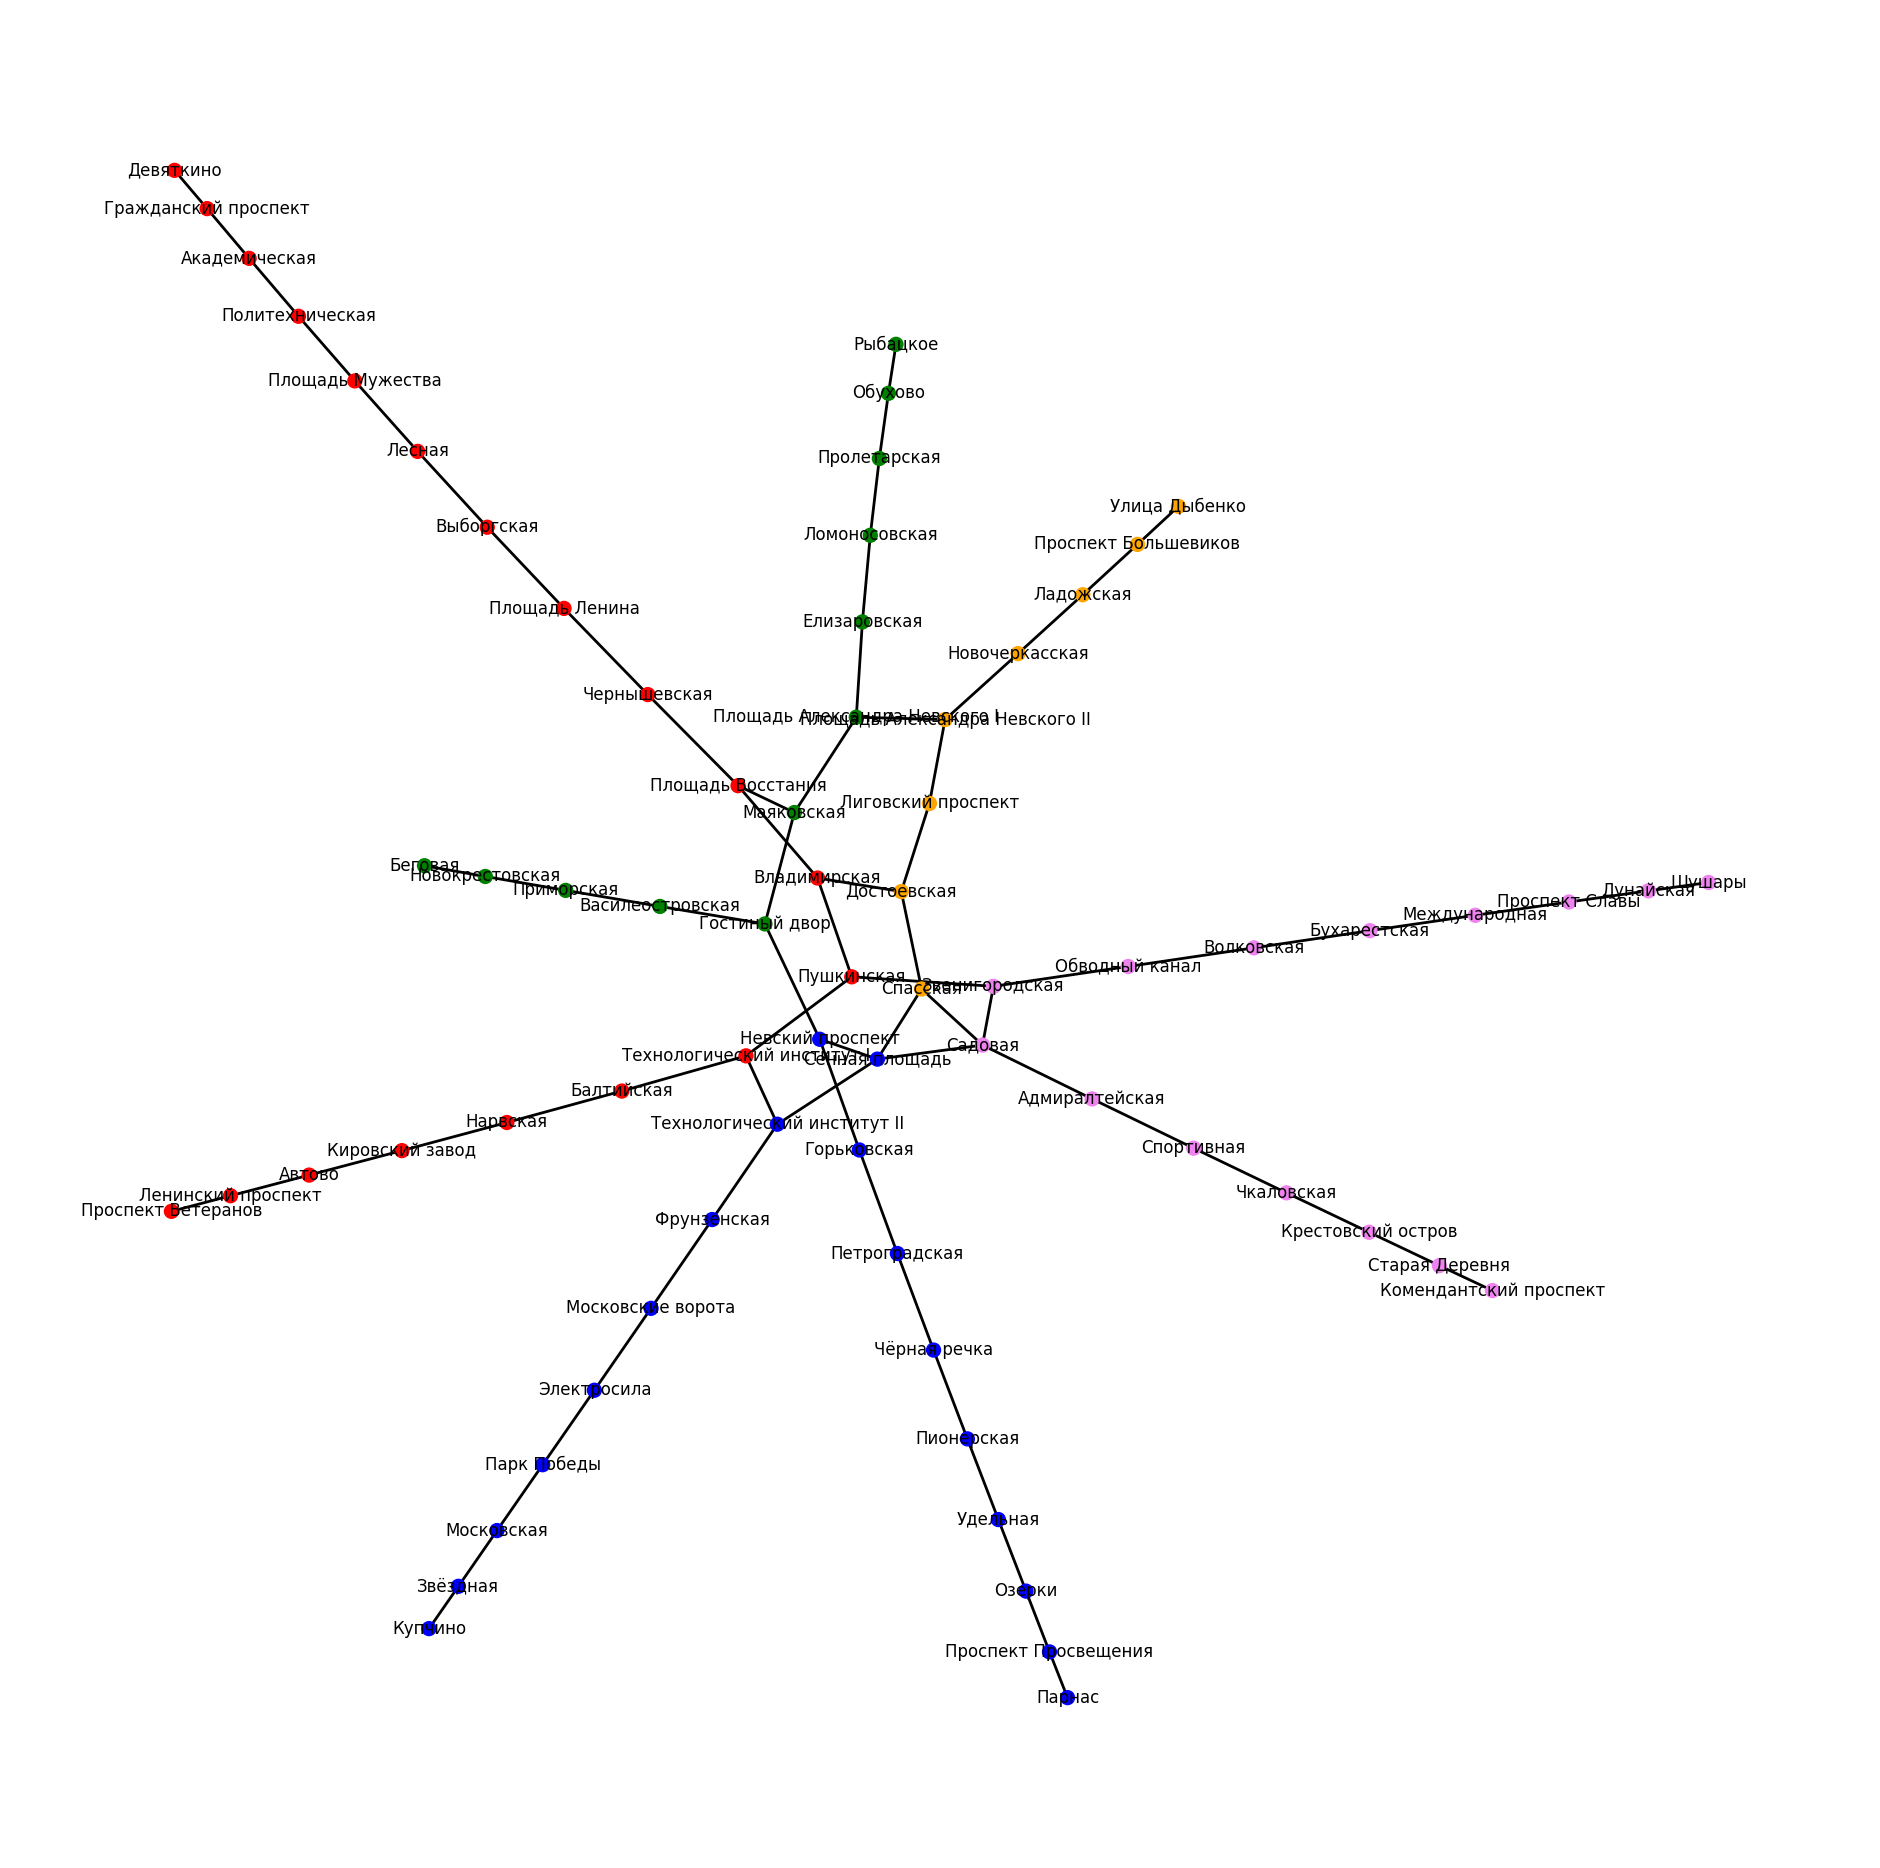

In [6]:
plt.figure(figsize=(24, 24))
pos = nx.spring_layout(G, seed=0, iterations=500)  # Позиционирование узлов

nx.draw_networkx_nodes(G, pos, node_size=100, node_color=node_color)  # Отрисовываем узлы
colors_edges = []

nx.draw_networkx_edges(G, pos, edge_color='black', width=2)
nx.draw_networkx_labels(G, pos)

plt.axis('off')
plt.show()

In [7]:
pagerank_vector = nx.pagerank(G)
print(pagerank_vector)
most_important_node = max(pagerank_vector, key=pagerank_vector.get)

print(f"The most important node: {most_important_node} with PageRank: {pagerank_vector[most_important_node]}")

{'Девяткино': 0.00890667287389451, 'Гражданский проспект': 0.016052917484989177, 'Академическая': 0.015060121396204086, 'Политехническая': 0.014476904280436825, 'Площадь Мужества': 0.014104713405722651, 'Лесная': 0.013805467783862872, 'Выборгская': 0.0134795918503683, 'Площадь Ленина': 0.01300687848385346, 'Чернышевская': 0.01222477577659831, 'Площадь Восстания': 0.016280960383878277, 'Владимирская': 0.015531734195923987, 'Пушкинская': 0.015625907329702413, 'Технологический институт I': 0.016321765267324324, 'Балтийская': 0.012356530098441027, 'Нарвская': 0.013292395003169939, 'Кировский завод': 0.014015908678472307, 'Автово': 0.014786476416880343, 'Ленинский проспект': 0.015871278421397593, 'Проспект Ветеранов': 0.008829226989092696, 'Парнас': 0.008893473537860049, 'Проспект Просвещения': 0.016022242368775582, 'Озерки': 0.015013576682952962, 'Удельная': 0.014398852870851835, 'Пионерская': 0.013966792604846266, 'Чёрная речка': 0.013559853640132225, 'Петроградская': 0.013038713452142556